<a href="https://colab.research.google.com/github/BrunoRaphaell/-IA-Aumentada-Prevendo-atrasos-de-voos./blob/aula_04/curso_modelo_atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

### Entendendo o conjunto de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data\\flights.csv')

In [3]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [10]:
df.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [13]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [14]:
df.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Visualizações gráficas dos dados

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

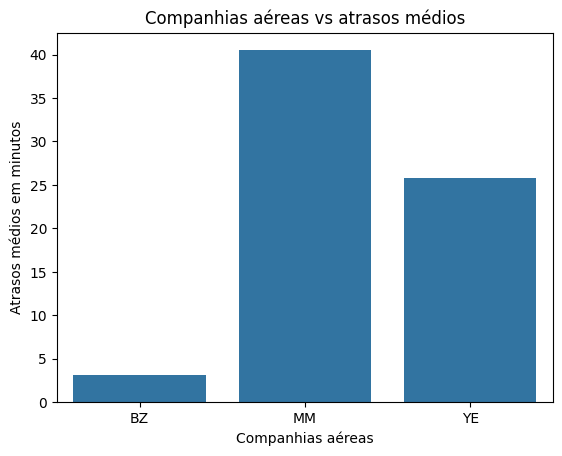

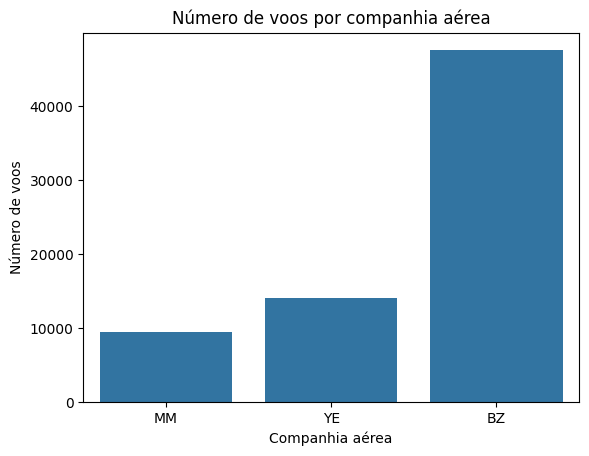

In [22]:
avarage_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avarage_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=df, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

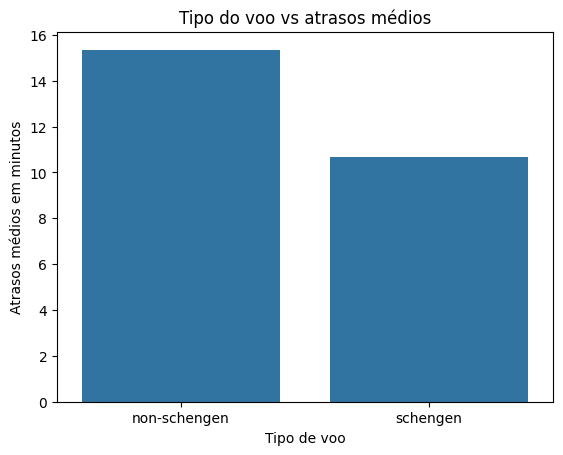

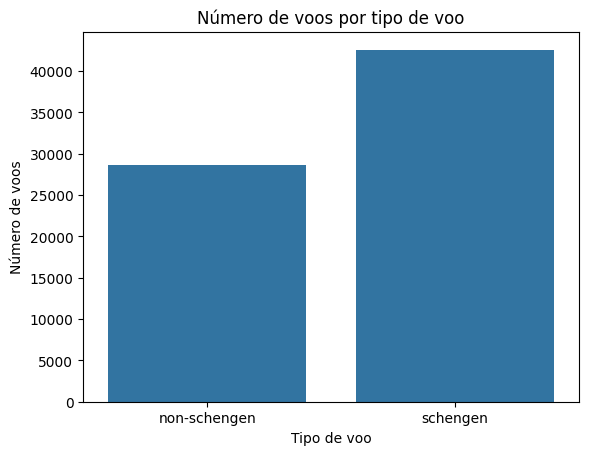

In [23]:
avarage_delay = df.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avarage_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo de voo')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=df, x='schengen')
plt.title('Número de voos por tipo de voo')
plt.xlabel('Tipo de voo')
plt.ylabel('Número de voos')
plt.show()

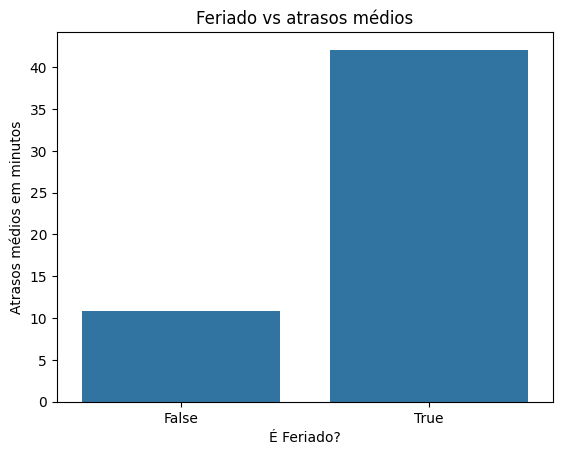

In [24]:
avarage_delay = df.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avarage_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É Feriado?')
plt.ylabel('Atrasos médios em minutos')
plt.show()


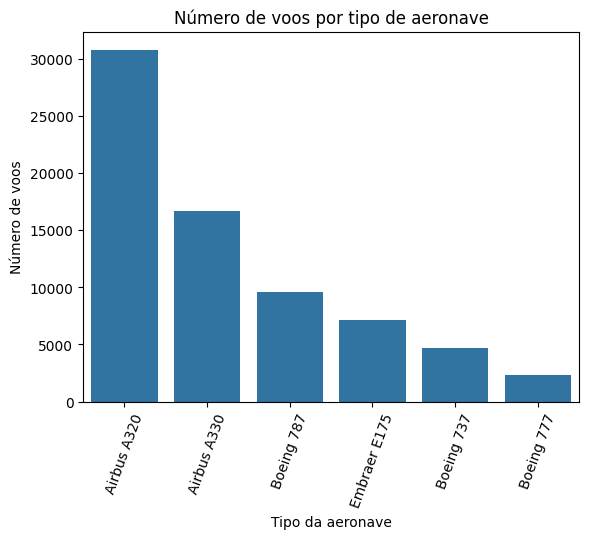

In [28]:
order = df['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type', order=order)
plt.title('Número de voos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

In [35]:
import numpy as np

def caculcar_lagura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75, 25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

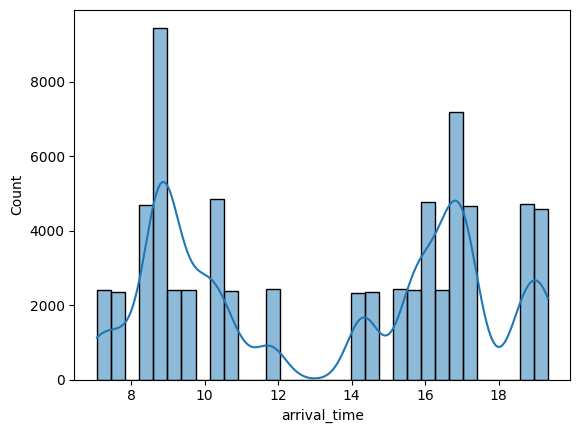

In [36]:
largura_bin_at = caculcar_lagura_bin(df, 'arrival_time')

sns.histplot(data=df, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

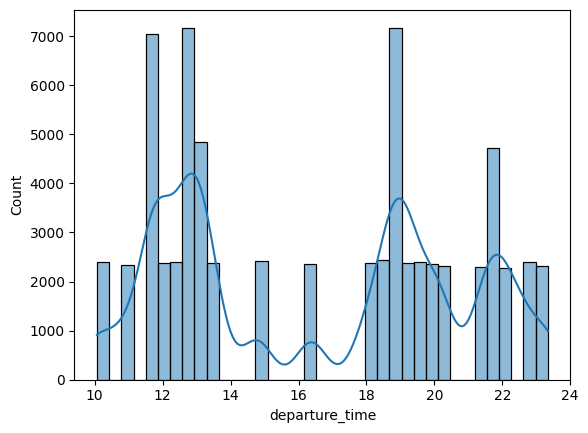

In [43]:
largura_bin_dt = caculcar_lagura_bin(df, 'departure_time')

sns.histplot(data=df, x='departure_time', kde=True, binwidth=largura_bin_dt)

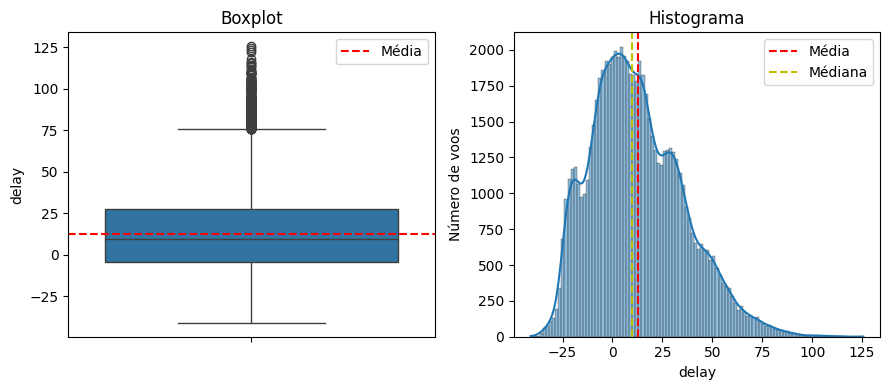

In [48]:
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = caculcar_lagura_bin(df, 'delay')
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Médiana')
axes[1].legend()

plt.tight_layout()
plt.show()


## Feature engineering

### Feature Encoding

### Limpando os Dados

## Seleção e validação do modelo

### Treinamento do DummyRegressor

### Treinamento do RandomForestRegressor

### Validação cruzada

## Otimização de hiperparâmetros

### Seleção de recursos

### Otimizando os hiperparâmetros com o GridSearchCV

### Salvando o modelo